In [21]:
import numpy as np 
import pandas as pd


## Project 3 NYC 311 

Importing the data

In [237]:
ny=pd.read_csv(r'C:\Python\Projects\Projects for Submission\Project3_NYC311\311_Service_Requests_from_2010_to_Present.csv')

C:\Users\Prateek\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [238]:
ny.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"


In [22]:
# Looking at the structure of the file
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
Unique Key                        364558 non-null int64
Created Date                      364558 non-null object
Closed Date                       362177 non-null object
Agency                            364558 non-null object
Agency Name                       364558 non-null object
Complaint Type                    364558 non-null object
Descriptor                        358057 non-null object
Location Type                     364425 non-null object
Incident Zip                      361560 non-null float64
Incident Address                  312859 non-null object
Street Name                       312859 non-null object
Cross Street 1                    307370 non-null object
Cross Street 2                    306753 non-null object
Intersection Street 1             51120 non-null object
Intersection Street 2             50512 non-null object
Address Type                      36

In [239]:
#checking for total null values
# axis = 0 for column wise analysis
print(ny.isnull().sum(axis = 0))


Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [240]:
# See how many variables in an observation have null values
print(ny.isnull().sum(axis = 1))

0         14
1         14
2         14
3         14
4         14
5         14
6         14
7         14
8         14
9         14
10        14
11        14
12        14
13        14
14        14
15        14
16        14
17        14
18        14
19        14
20        14
21        14
22        14
23        14
24        14
25        14
26        14
27        14
28        14
29        14
          ..
364528    14
364529    14
364530    16
364531    14
364532    14
364533    14
364534    14
364535    14
364536    17
364537    14
364538    14
364539    14
364540    14
364541    14
364542    14
364543    14
364544    14
364545    14
364546    14
364547    14
364548    14
364549    16
364550    14
364551    16
364552    16
364553    14
364554    14
364555    14
364556    14
364557    14
Length: 364558, dtype: int64


In [241]:
#get the row names of NYC data
ny.index.values

array([     0,      1,      2, ..., 364555, 364556, 364557], dtype=int64)

In [242]:
#get the column names of NYC data
ny.columns.values

array(['Unique Key', 'Created Date', 'Closed Date', 'Agency',
       'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
       'Incident Zip', 'Incident Address', 'Street Name',
       'Cross Street 1', 'Cross Street 2', 'Intersection Street 1',
       'Intersection Street 2', 'Address Type', 'City', 'Landmark',
       'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name',
       'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City',
       'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot 

In [243]:
# Getting the descriptive statistics of the numerical attributes of the dataset
ny.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


## Exploratory data analysis

Importing the libraries for visualization

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline 

In [34]:
# to get the counts of a categorical column
ny.Agency.value_counts()


NYPD    364558
Name: Agency, dtype: int64

In [36]:

# To see the distribution of the complaint types
ny['Complaint Type'].value_counts()


# to get the proportions of a categorical column
# ny['Complaint Type'].value_counts(normalize=True)

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

In [244]:
ny['Complaint Type'].value_counts()[:10]

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

## To get the top 10 complaints by type

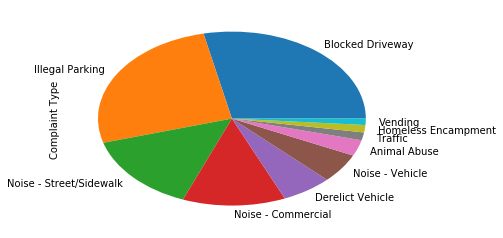

In [245]:
ny['Complaint Type'].value_counts().head(10).plot(kind='pie')

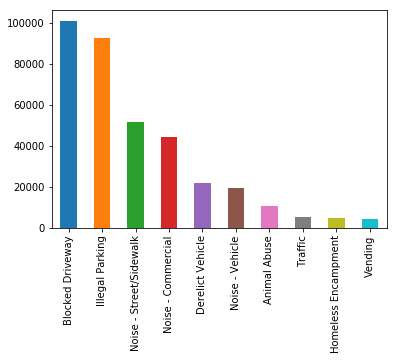

In [249]:
ny['Complaint Type'].value_counts().head(10).plot(kind='bar')

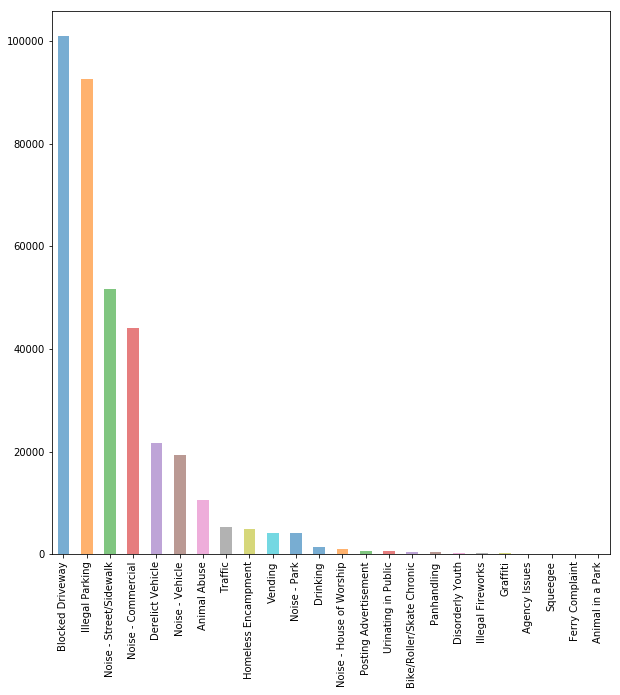

In [248]:
#Complaint type Breakdown with bar plot to figure out majority of complaint types and top 10 complaints
ny['Complaint Type'].value_counts().plot(kind='bar',alpha=0.6,figsize=(10,10))


In [ ]:
# analysis of the status of tickets which have been filed

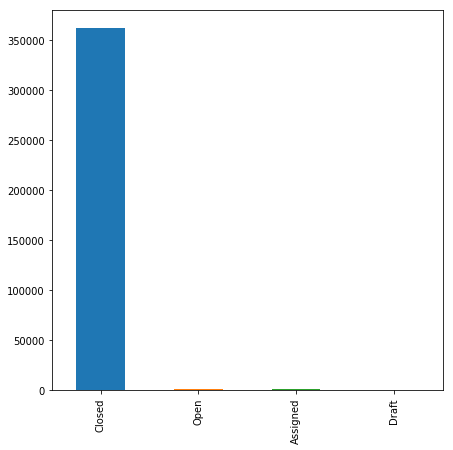

In [250]:

ny['Status'].value_counts().plot(kind='bar',figsize=(7,7))


## Display the complaint type and city together

In [251]:
# Grouping by the city and the complaint type

city_comp=ny.groupby(['City','Complaint Type']).size()

In [166]:
city_comp

City       Complaint Type           
ARVERNE    Animal Abuse                   46
           Blocked Driveway               50
           Derelict Vehicle               32
           Disorderly Youth                2
           Drinking                        1
           Graffiti                        1
           Homeless Encampment             4
           Illegal Parking                62
           Noise - Commercial              2
           Noise - House of Worship       14
           Noise - Park                    2
           Noise - Street/Sidewalk        29
           Noise - Vehicle                10
           Panhandling                     1
           Traffic                         1
           Urinating in Public             1
           Vending                         1
ASTORIA    Animal Abuse                  170
           Bike/Roller/Skate Chronic      16
           Blocked Driveway             3436
           Derelict Vehicle              426
           Disorde

In [252]:
# in order to get the count by the complaint type, use unstack
city_comp.unstack()

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Parking,Noise - Commercial,Noise - House of Worship,...,Noise - Vehicle,Panhandling,Traffic,Urinating in Public,Vending,Bike/Roller/Skate Chronic,Illegal Fireworks,Posting Advertisement,Squeegee,Animal in a Park
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,46.0,50.0,32.0,2.0,1.0,1.0,4.0,62.0,2.0,14.0,...,10.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
ASTORIA,170.0,3436.0,426.0,5.0,43.0,4.0,32.0,1340.0,1653.0,21.0,...,236.0,2.0,60.0,10.0,57.0,16.0,4.0,3.0,NaN,NaN
Astoria,NaN,159.0,14.0,NaN,NaN,NaN,NaN,277.0,311.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAYSIDE,53.0,514.0,231.0,2.0,1.0,3.0,2.0,638.0,47.0,3.0,...,24.0,NaN,9.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
BELLEROSE,15.0,138.0,120.0,2.0,1.0,NaN,1.0,132.0,38.0,1.0,...,11.0,1.0,9.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN
BREEZY POINT,2.0,3.0,3.0,NaN,1.0,NaN,NaN,16.0,4.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BRONX,1971.0,17063.0,2403.0,66.0,206.0,15.0,275.0,9889.0,2945.0,90.0,...,3556.0,20.0,427.0,54.0,433.0,22.0,24.0,18.0,NaN,NaN
BROOKLYN,3191.0,36447.0,6259.0,79.0,291.0,60.0,948.0,33533.0,13860.0,389.0,...,5966.0,49.0,1258.0,155.0,575.0,124.0,61.0,58.0,NaN,NaN
CAMBRIA HEIGHTS,15.0,177.0,148.0,NaN,NaN,NaN,6.0,113.0,19.0,2.0,...,100.0,NaN,7.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [168]:
# To get the total no of complaints for each city
a=city_comp.unstack().sum(axis=1)

City
ARVERNE                   259.0
ASTORIA                  7991.0
Astoria                   906.0
BAYSIDE                  1550.0
BELLEROSE                 487.0
BREEZY POINT               31.0
BRONX                   49171.0
BROOKLYN               118862.0
CAMBRIA HEIGHTS           617.0
CENTRAL PARK              110.0
COLLEGE POINT            1544.0
CORONA                   5383.0
EAST ELMHURST            3558.0
ELMHURST                 3438.0
East Elmhurst              30.0
FAR ROCKAWAY             1397.0
FLORAL PARK               196.0
FLUSHING                 7487.0
FOREST HILLS             2122.0
FRESH MEADOWS            2453.0
GLEN OAKS                 361.0
HOLLIS                   1231.0
HOWARD BEACH             1144.0
Howard Beach                1.0
JACKSON HEIGHTS          2106.0
JAMAICA                  8932.0
KEW GARDENS              1008.0
LITTLE NECK               712.0
LONG ISLAND CITY         3028.0
Long Island City          170.0
MASPETH                  3118.0
MID

## To get the complaints by city

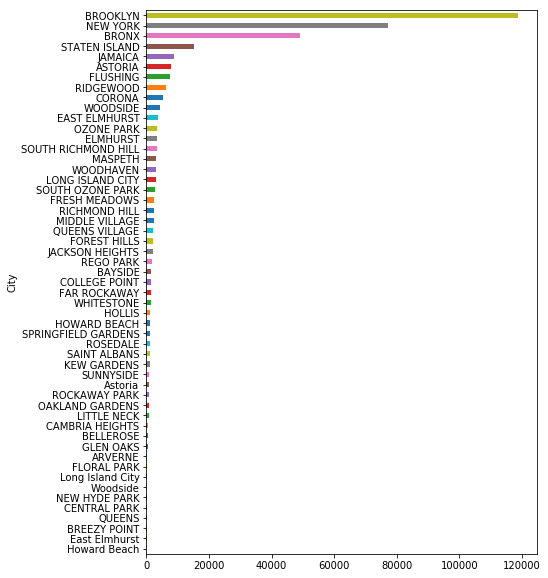

In [170]:
city_comp.unstack().sum(axis=1).sort_values(ascending=True).plot(kind='barh',figsize=(7,10))

In [174]:
import pandas as pd
import numpy as np

## Movielens project

## Read the Readme document carefully where we have the file description



RATINGS FILE DESCRIPTION
================================================================================

All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 rating

## Importing the ratings dat file

In [11]:
ratings = pd.read_table(r'C:\Python\Projects\Projects for Submission\Project4_Movielens\ratings.dat',sep='::',names=['user','movie','rating','time'])

C:\Users\Prateek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [12]:
ratings.head()

,user,movie,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


USERS FILE DESCRIPTION
================================================================================

User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"


In [175]:
# Importing the users file

users = pd.read_table(r'C:\Python\Projects\Projects for Submission\Project4_Movielens\users.dat',sep='::',names=['user','gender','age','occupation','zip'])

C:\Users\Prateek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [176]:
users.head()

,user,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


MOVIES FILE DESCRIPTION
================================================================================

Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

- Some MovieIDs do not correspond to a movie due to accidental duplicate
entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist


In [177]:
# importing the movies dat file

movies = pd.read_table(r'C:\Python\Projects\Projects for Submission\Project4_Movielens\movies.dat',sep='::',names=['movie','title','genre'])

C:\Users\Prateek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [178]:
movies.head()

,movie,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Removing the (year of release) from the title

In [179]:
movies.title =movies.title.str[:-7]

In [180]:
movies.head()

,movie,title,genre
0,1,Toy Story,Animation|Children's|Comedy
1,2,Jumanji,Adventure|Children's|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama
4,5,Father of the Bride Part II,Comedy


In [196]:
users_ratings=users.merge(ratings,how='inner',on='user')

In [182]:
users_ratings.head()

,user,gender,age,occupation,zip,movie,rating,time
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291


In [197]:
lens=users_ratings.merge(movies,how='inner',on='movie')

In [192]:
lens.head(3)

,user,gender,age,occupation,zip,movie,rating,time,title,genre
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest,Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest,Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest,Drama


In [198]:
# Converting the time from seconds into year
import time
lens['time'] = lens['time'].apply(lambda x: time.strftime('%Y', time.localtime(x)))


In [201]:
help(time.strftime)

Help on built-in function strftime in module time:

strftime(...)
    strftime(format[, tuple]) -> string
    
    Convert a time tuple to a string according to a format specification.
    See the library reference manual for formatting codes. When the time tuple
    is not present, current time as returned by localtime() is used.
    
    Commonly used format codes:
    
    %Y  Year with century as a decimal number.
    %m  Month as a decimal number [01,12].
    %d  Day of the month as a decimal number [01,31].
    %H  Hour (24-hour clock) as a decimal number [00,23].
    %M  Minute as a decimal number [00,59].
    %S  Second as a decimal number [00,61].
    %z  Time zone offset from UTC.
    %a  Locale's abbreviated weekday name.
    %A  Locale's full weekday name.
    %b  Locale's abbreviated month name.
    %B  Locale's full month name.
    %c  Locale's appropriate date and time representation.
    %I  Hour (12-hour clock) as a decimal number [01,12].
    %p  Locale's equivalent o

In [214]:
lens.head(2)

,user,gender,age,occupation,zip,movie,rating,time,title,genre
0,1,F,1,10,48067,1193,5,2001,One Flew Over the Cuckoo's Nest,Drama
1,2,M,56,16,70072,1193,5,2001,One Flew Over the Cuckoo's Nest,Drama


In [67]:
lens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user          1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip           1000209 non-null object
movie         1000209 non-null int64
rating        1000209 non-null int64
time          1000209 non-null object
title         1000209 non-null object
genre         1000209 non-null object
dtypes: int64(5), object(5)
memory usage: 83.9+ MB


In [49]:
# we can also combine the 3 datasets in one go
a = pd.merge(pd.merge(ratings,users),movies)

In [54]:
#minimum rating given to a movie
lens['rating'].min() 

1

In [202]:
lens['rating'].value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: rating, dtype: int64

In [55]:
#maximum rating given to a movie
lens['rating'].max()

5

In [56]:
# checking the overall dataset
lens.shape

(1000209, 10)

In [206]:
a=pd.DataFrame([1,2,3])

In [207]:
a.isnull()

,0
0,False
1,False
2,False


In [210]:
1+False

1

In [57]:
#checking for total null values
# axis = 0 for column wise analysis
print(lens.isnull().sum(axis = 0))


user          0
gender        0
age           0
occupation    0
zip           0
movie         0
rating        0
time          0
title         0
genre         0
dtype: int64


Visualize users age description

## Age distribution of the users

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Age of the users')

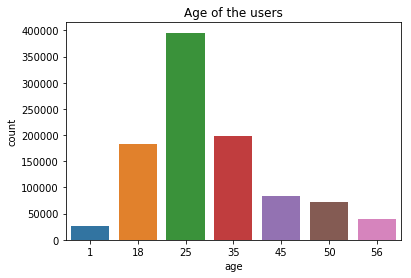

In [213]:
sns.countplot(x='age',data=lens).set_title('Age of the users')


## How many movies got the ratings from 1-5

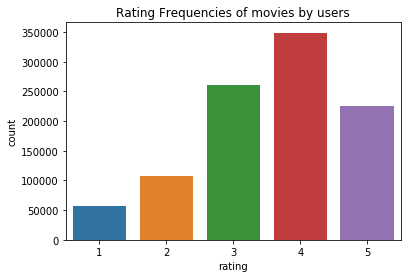

In [81]:
ax = sns.countplot(x='rating', data=lens)
ax.set_title('Rating Frequencies of movies by users')


## How the no of ratings per year were given

Text(0.5,1,'No of ratings per year')

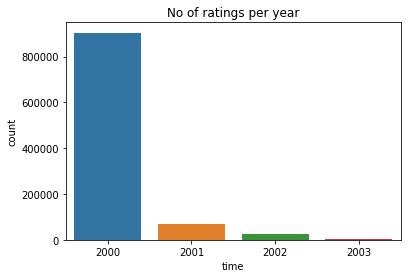

In [215]:
ax = sns.countplot(x='time', data=lens)
ax.set_title('No of ratings per year')


In [77]:
# You can also have a tabular representation of the above graph as:
lens['time'].value_counts()

2000    904175
2001     68628
2002     24053
2003      3353
Name: time, dtype: int64

In [217]:
# Looking at different genres
a=lens['genre'].value_counts()
type(a)

pandas.core.series.Series

In [74]:
# Looking at top 25 different genres
lens['genre'].value_counts()[:25]

Comedy                          116883
Drama                           111423
Comedy|Romance                   42712
Comedy|Drama                     42245
Drama|Romance                    29170
Action|Thriller                  26759
Horror                           22563
Drama|Thriller                   18248
Thriller                         17851
Action|Adventure|Sci-Fi          17783
Drama|War                        14656
Action|Sci-Fi                    14309
Action|Sci-Fi|Thriller           13970
Action                           12311
Action|Drama|War                 12224
Crime|Drama                      11870
Comedy|Drama|Romance             11069
Action|Adventure                 10446
Action|Drama                     10382
Comedy|Horror                     9681
Comedy|Sci-Fi                     9311
Children's|Comedy                 9077
Animation|Children's              8851
Horror|Thriller                   8649
Animation|Children's|Musical      8220
Name: genre, dtype: int64

## Distributions of the movie-ratings across different genres

In [221]:
lens[lens['genre']=='Comedy'].rating

14386      4
14387      5
14388      5
14389      4
14390      4
14391      4
14392      3
14393      5
14394      5
14395      3
14396      5
14397      4
14398      4
14399      3
14400      4
14401      5
14402      4
14403      5
14404      5
14405      4
14406      4
14407      3
14408      3
14409      4
14410      5
14411      1
14412      5
14413      5
14414      5
14415      5
          ..
1000029    3
1000030    4
1000031    4
1000041    5
1000085    4
1000086    3
1000087    3
1000088    5
1000089    5
1000096    3
1000097    3
1000098    2
1000101    2
1000102    5
1000103    3
1000118    4
1000119    3
1000120    1
1000121    3
1000125    3
1000131    4
1000132    4
1000158    1
1000159    1
1000160    1
1000161    1
1000163    3
1000191    3
1000192    4
1000202    4
Name: rating, Length: 116883, dtype: int64

C:\Users\Prateek\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Prateek\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Prateek\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


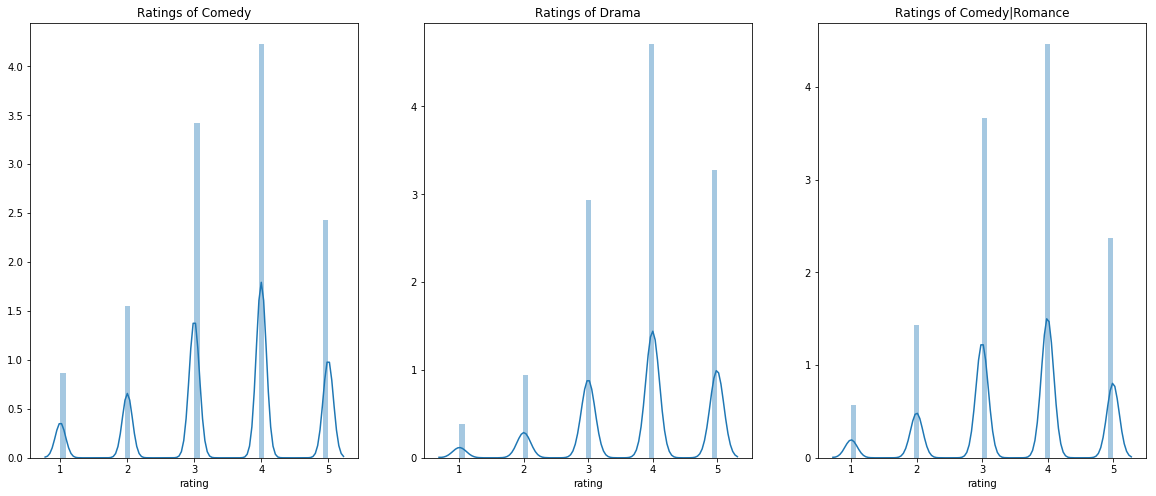

In [222]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(lens[lens['genre']=='Comedy'].rating,ax=ax[0])
ax[0].set_title('Ratings of Comedy')
sns.distplot(lens[lens['genre']=='Comedy|Romance'].rating,ax=ax[2])
ax[2].set_title('Ratings of Comedy|Romance')
sns.distplot(lens[lens['genre']=='Drama'].rating,ax=ax[1])
ax[1].set_title('Ratings of Drama')
plt.show()


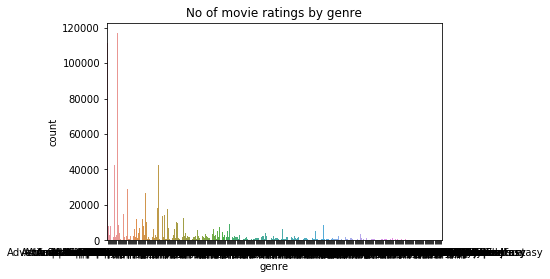

In [89]:
ax = sns.countplot(x='genre', data=lens)
ax.set_title('No of movie ratings by genre')
plt.show()

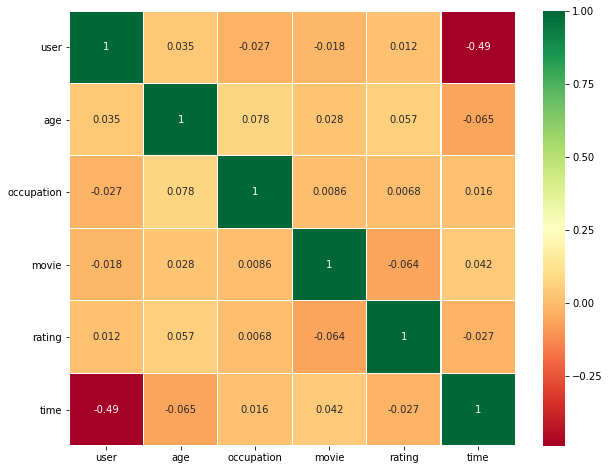

In [150]:
sns.heatmap(lens.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)


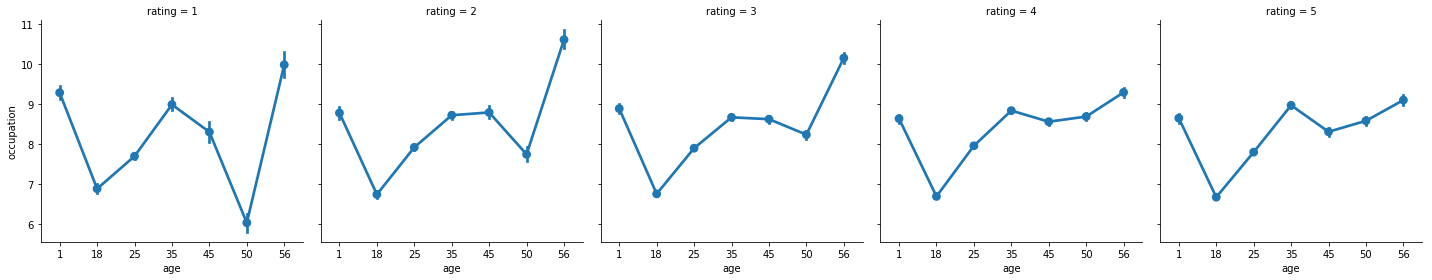

In [225]:
sns.factorplot('age','occupation',data=lens,col='rating')
plt.show()

## Find and visualize the user rating of the movie “Toy Story”

In [227]:
lens[lens['title']=='Toy Story']

,user,gender,age,occupation,zip,movie,rating,time,title,genre
41626,1,F,1,10,48067,1,5,2001,Toy Story,Animation|Children's|Comedy
41627,6,F,50,9,55117,1,4,2000,Toy Story,Animation|Children's|Comedy
41628,8,M,25,12,11413,1,4,2000,Toy Story,Animation|Children's|Comedy
41629,9,M,25,17,61614,1,5,2000,Toy Story,Animation|Children's|Comedy
41630,10,F,35,1,95370,1,5,2000,Toy Story,Animation|Children's|Comedy
41631,18,F,18,3,95825,1,4,2000,Toy Story,Animation|Children's|Comedy
41632,19,M,1,10,48073,1,5,2001,Toy Story,Animation|Children's|Comedy
41633,21,M,18,16,99353,1,3,2000,Toy Story,Animation|Children's|Comedy
41634,23,M,35,0,90049,1,4,2001,Toy Story,Animation|Children's|Comedy
41635,26,M,25,7,23112,1,3,2000,Toy Story,Animation|Children's|Comedy


In [228]:
ts=lens[lens['title']=='Toy Story']

In [229]:
ts.head()


,user,gender,age,occupation,zip,movie,rating,time,title,genre
41626,1,F,1,10,48067,1,5,2001,Toy Story,Animation|Children's|Comedy
41627,6,F,50,9,55117,1,4,2000,Toy Story,Animation|Children's|Comedy
41628,8,M,25,12,11413,1,4,2000,Toy Story,Animation|Children's|Comedy
41629,9,M,25,17,61614,1,5,2000,Toy Story,Animation|Children's|Comedy
41630,10,F,35,1,95370,1,5,2000,Toy Story,Animation|Children's|Comedy


In [230]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
    - A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
      variables will determine how the data are plotted.
    - A "wide-form" DataFrame, such that each numeric column will be plotted.
    - Anything accepted by `

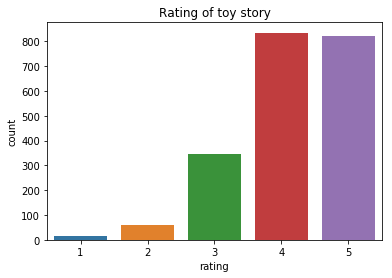

In [100]:
ax = sns.countplot(x='rating', data=ts)
ax.set_title('Rating of toy story')
plt.show()

## Find and visualize the viewership of the movie “Toy Story” by age group

Text(0.5,1,'Viewership of toy story by age group')

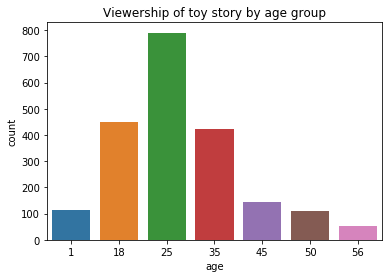

In [101]:
ax = sns.countplot(x='age', data=ts)
ax.set_title('Viewership of toy story by age group')


## Find and visualize the top 25 movies by viewership rating

1. Split the DataFrame into groups by movie title 
2. Applying the size method to get the count of records in each group.
3. order our results in descending order
4. Limit to 25

In [102]:
top_25= lens.groupby('title').size().sort_values(ascending=False)[:25]


In [103]:
top_25

title
American Beauty                                   3428
Star Wars: Episode IV - A New Hope                2991
Star Wars: Episode V - The Empire Strikes Back    2990
Star Wars: Episode VI - Return of the Jedi        2883
Jurassic Park                                     2672
Saving Private Ryan                               2653
Terminator 2: Judgment Day                        2649
Matrix, The                                       2590
Back to the Future                                2583
Silence of the Lambs, The                         2578
Men in Black                                      2538
Raiders of the Lost Ark                           2514
Fargo                                             2513
Sixth Sense, The                                  2459
Braveheart                                        2443
Shakespeare in Love                               2369
Princess Bride, The                               2318
Schindler's List                                  2304
L.A.

In [112]:

# We can also do like this:
lens.title.value_counts()[:25]

American Beauty                                   3428
Star Wars: Episode IV - A New Hope                2991
Star Wars: Episode V - The Empire Strikes Back    2990
Star Wars: Episode VI - Return of the Jedi        2883
Jurassic Park                                     2672
Saving Private Ryan                               2653
Terminator 2: Judgment Day                        2649
Matrix, The                                       2590
Back to the Future                                2583
Silence of the Lambs, The                         2578
Men in Black                                      2538
Raiders of the Lost Ark                           2514
Fargo                                             2513
Sixth Sense, The                                  2459
Braveheart                                        2443
Shakespeare in Love                               2369
Princess Bride, The                               2318
Schindler's List                                  2304
L.A. Confi

In [129]:
#displays high rated movies
high_rated= lens['rating']>4.0
lens[high_rated].head()

,user,gender,age,occupation,zip,movie,rating,time,title,genre
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest,Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest,Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest,Drama
6,19,M,1,10,48073,1193,5,982730936,One Flew Over the Cuckoo's Nest,Drama
7,24,F,25,7,10023,1193,5,978136709,One Flew Over the Cuckoo's Nest,Drama


## Find the rating for a particular user of user id = 2696

In [232]:
lens[lens['user']==2696]

,user,gender,age,occupation,zip,movie,rating,time,title,genre
24345,2696,M,25,7,24210,1270,2,2000,Back to the Future,Comedy|Sci-Fi
29848,2696,M,25,7,24210,1097,3,2000,E.T. the Extra-Terrestrial,Children's|Drama|Fantasy|Sci-Fi
244232,2696,M,25,7,24210,1617,4,2000,L.A. Confidential,Crime|Film-Noir|Mystery|Thriller
250014,2696,M,25,7,24210,800,5,2000,Lone Star,Drama|Mystery
273633,2696,M,25,7,24210,3386,1,2000,JFK,Drama|Mystery
277808,2696,M,25,7,24210,3176,4,2000,"Talented Mr. Ripley, The",Drama|Mystery|Thriller
371178,2696,M,25,7,24210,1711,4,2000,Midnight in the Garden of Good and Evil,Comedy|Crime|Drama|Mystery
377250,2696,M,25,7,24210,1589,3,2000,Cop Land,Crime|Drama|Mystery
598042,2696,M,25,7,24210,1783,4,2000,Palmetto,Film-Noir|Mystery|Thriller
603189,2696,M,25,7,24210,1892,4,2000,"Perfect Murder, A",Mystery|Thriller


In [233]:
us_2696=lens[lens['user']==2696]

In [234]:
us_2696

,user,gender,age,occupation,zip,movie,rating,time,title,genre
24345,2696,M,25,7,24210,1270,2,2000,Back to the Future,Comedy|Sci-Fi
29848,2696,M,25,7,24210,1097,3,2000,E.T. the Extra-Terrestrial,Children's|Drama|Fantasy|Sci-Fi
244232,2696,M,25,7,24210,1617,4,2000,L.A. Confidential,Crime|Film-Noir|Mystery|Thriller
250014,2696,M,25,7,24210,800,5,2000,Lone Star,Drama|Mystery
273633,2696,M,25,7,24210,3386,1,2000,JFK,Drama|Mystery
277808,2696,M,25,7,24210,3176,4,2000,"Talented Mr. Ripley, The",Drama|Mystery|Thriller
371178,2696,M,25,7,24210,1711,4,2000,Midnight in the Garden of Good and Evil,Comedy|Crime|Drama|Mystery
377250,2696,M,25,7,24210,1589,3,2000,Cop Land,Crime|Drama|Mystery
598042,2696,M,25,7,24210,1783,4,2000,Palmetto,Film-Noir|Mystery|Thriller
603189,2696,M,25,7,24210,1892,4,2000,"Perfect Murder, A",Mystery|Thriller


Text(0.5,1,'Ratings of user 2696')

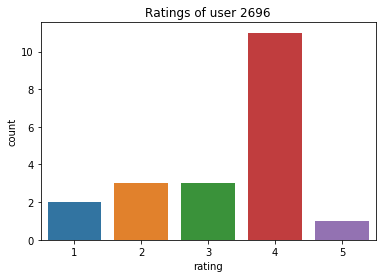

In [235]:
ax = sns.countplot(x='rating', data=us_2696)
ax.set_title('Ratings of user 2696')

In [139]:
# Extract first 500 records


In [236]:
df=lens.loc[0:499,['movie','age','occupation','rating']]

In [143]:
df.head()

,movie,age,occupation,rating
0,1193,1,10,5
1,1193,56,16,5
2,1193,25,12,4
3,1193,25,7,4
4,1193,50,1,5


In [172]:

from sklearn.model_selection import train_test_split

In [173]:
## fix the randomness 
train , test = train_test_split(df, test_size = 0.30, random_state = 2)